In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('bollywood.csv')
x=df.head(7)
x

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373


In [21]:
df.sample(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
56,57,2014-08-22,Mardaani,N,Drama,15,36.0,4376650,14408,1035,8,1.400000
100,101,2013-07-05,Policegiri,N,Action,30,16.8,1754266,1674,420,7,-0.440000
31,32,2013-02-15,Murder 3,FS,Thriller,12,25.0,2249055,1879,747,2,1.083333
134,135,2013-09-20,Phata Poster Nikla Hero,N,Drama,40,34.0,5176897,10672,1392,9,-0.150000
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
110,111,2014-02-07,Hasee To Phansee,N,Romance,27,35.5,2543707,6390,975,2,0.314815
141,142,2015-02-06,Shamitabh,N,Drama,40,38.0,2105508,5599,677,2,-0.050000
138,139,2015-01-23,Baby,N,Action,60,125.0,7968156,29246,2426,1,1.083333
130,131,2013-09-06,Zanjeer,LW,Action,75,18.2,2539431,5634,922,9,-0.757333


# How many records are present in the record

In [10]:
df.shape[0]

149

# How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [11]:
df.Genre.value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

# How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [12]:
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


# Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [13]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Month']=df['Release Date'].dt.month
df.Month.value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

# Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [14]:
df[df.Budget>=25]['Release Date'].dt.month.value_counts()

2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: Release Date, dtype: int64

# Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [15]:
df['ROI']=(df.BoxOfficeCollection-df.Budget)/df.Budget
df.sort_values(by='ROI').MovieName[0:10]

9                 Gangoobai
15                  Bandook
53                 Sona Spa
3          Rajdhani Express
49     Kya Dilli Kya Lahore
121                 Satya 2
67             Purani Jeans
103          Samrat and Co.
30                Heartless
102                 Kaanchi
Name: MovieName, dtype: object

# Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [16]:
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

# Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [17]:
corr=df[['BoxOfficeCollection','YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


# Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

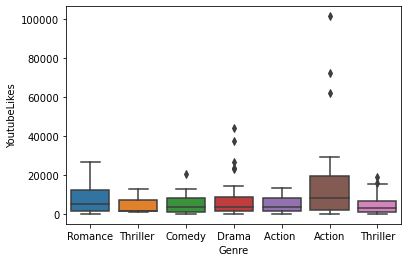

In [18]:
sns.boxplot(x='Genre',y='YoutubeLikes',data=df)

# Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

<AxesSubplot:>

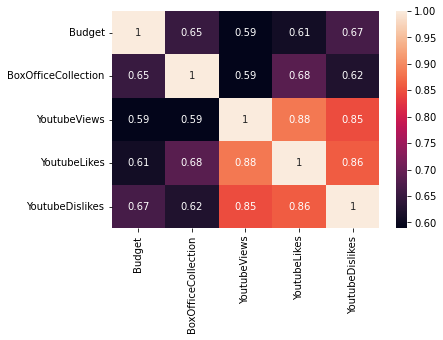

In [19]:
corr=df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr()
sns.heatmap(corr,annot=True)

In [20]:
df.sample(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
70,71,2013-05-03,Bombay Talkies,N,Drama,6,14.30,1528538,2766,328,5,1.383333
31,32,2013-02-15,Murder 3,FS,Thriller,12,25.00,2249055,1879,747,2,1.083333
140,141,2015-01-30,Khamoshiyan,N,Thriller,11,14.02,3094001,4599,997,1,0.274545
25,26,2013-02-08,Special 26,N,Drama,42,103.00,1829417,6248,568,2,1.452381
65,66,2014-03-28,O Teri,N,Comedy,21,3.75,1511318,3004,278,3,-0.821429
50,51,2014-07-04,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497,7,-0.843750
90,91,2013-06-21,Raanjhanaa,N,Romance,35,100.00,5470632,12413,1018,6,1.857143
98,99,2014-07-18,Pizza 3D,N,Thriller,10,4.35,838943,1116,153,7,-0.565000
106,107,2014-03-14,Bewakoofiyan,FS,Romance,22,14.00,2850376,4764,1068,3,-0.363636
76,77,2013-05-17,Aurangzeb,N,Drama,20,23.00,1901503,3394,754,5,0.150000
